In [1]:
import requests

In [2]:
URL="https://app-aiml24.cloud.sdu.dk/v1/completions"

***
***

In [3]:
class UCloudRequester:
    """ This class is a simple container for the UCloud API 
    request. It is used to send a query to the UCloud API 
    and return the response with or without metadata."""

    def __init__(self, url : str) -> None:
        self.url = url # URL of the UCloud API

    def call_url(self, prompt : str, **params) -> dict:
        """This method handles the call to the UCloud API and
        returns the response as a dictionary"""

        try:
            query = {'prompt': prompt, **params}
            response = requests.post(
                url=self.url,
                headers={'Content-Type': 'application/json'},
                json=query
            )
            response.raise_for_status() # <- Raises an exception if the response is not OK
            return response.json() # <- Translates JSON to dictionary
        
        except requests.exceptions.JSONDecodeError:
            return f"JSONDecodeError: Failed to decode response as JSON: {response.text}"

        except requests.exceptions.HTTPError as e:
            return "HTTPError: " + str(e)
        
    def predict(self, prompt : str, return_meta=False, **params) -> dict:
        """This method is the main method for sending a request.
        if return_meta is set to True, the method will return the
        full response as a dictionary. Otherwise, it will return
        the text of the first choice in the response."""

        result : dict = self.call_url(prompt, **params)
        if return_meta:
            return result
        return result["choices"][0]["text"]
    

requester = UCloudRequester(
    url=URL,
)

***
***

In [4]:
# Example model parameters
params = dict(
    max_tokens=50,
    temperature=0.7,
    stop=[],
)

In [5]:
PROMPT = """Write the first verse of the most famous Danish song: \nVerse:""" 

In [19]:
PROMPT="did masks help stop the spread of the virus?"

In [8]:
prediction = requester.predict(prompt=PROMPT, return_meta=True, **params)

'JSONDecodeError: Failed to decode response as JSON: \n            <!doctype html>\n            <html lang="en">\n            <head>\n                <meta charset="UTF-8">\n                <meta name="viewport"\n                      content="width=device-width, user-scalable=no, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0">\n                <meta http-equiv="X-UA-Compatible" content="ie=edge">\n                <title>Job is unavailable | UCloud</title>\n                <style>\n                    body {\n                        font-family: \'IBM Plex Sans\', sans-serif;\n                        background: #282c35;\n                        color: white;\n                        display: flex;\n                        align-items: center;\n                        justify-content: center;\n                        flex-direction: column;\n                        height: 100vh;\n                        width: 100vw;\n                        margin: 0;\n                     
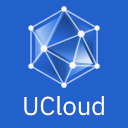

In [9]:
prediction

In [16]:
PROMPT = """Write a short poem about the meaning of life.
Poem:

"""

In [17]:
%%timeit -n 10 -r 10

prediction = requester.predict(prompt=PROMPT, return_meta=True, **params)

979 ms ± 39.3 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [18]:
print(prediction["choices"][0]["text"])



In my opinion, I believe that masks can be effective in stopping the spread of COVID-19, but it depends on how they are used. When worn properly, masks can help to block respiratory droplets that may contain


In [24]:
PROMPT = """Write a {} about the meaning of {}.
Poem:

"""
prompts = [
    "Write little song  about something clever.",
    "The turtle is a majestic creature. Write a poem about it.",
    "Who invented AI?",
    "who is the best football player in the world?",
    "i am very great. Can you thank me?",
]

In [25]:
for prompt in prompts:
    prediction = requester.predict(prompt=prompt, **params)
    print(prediction)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [11]:
%%timeit -n 10 -r 10

prediction = requester.predict(prompt=PROMPT, return_meta=True, **params)

853 ms ± 181 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)
